# Компоновщик
Паттерн компоновщик (Composite) используется для организации объектов в древовидную структуру и работы с ней как с единым целым. Он позволяет обрабатывать отдельные объекты и группы объектов одинаковым образом, что упрощает код и увеличивает его гибкость.

Пример применения паттерна компоновщик может быть в разработке графических редакторов. В таких редакторах можно создавать сложные изображения, которые состоят из множества элементов, таких как линии, кривые, фигуры и т.д. Каждый элемент может быть обработан отдельно, но также можно выделить группу элементов и обработать их как единое целое.

Также паттерн компоновщик может использоваться в разработке интерфейсов пользовательских приложений. Например, в окнах приложения можно создавать сложные макеты, которые состоят из множества элементов интерфейса, таких как кнопки, поля ввода, списки и т.д. Каждый элемент может иметь свой собственный функционал, но также можно выделить группу элементов и обработать их как единое целое.

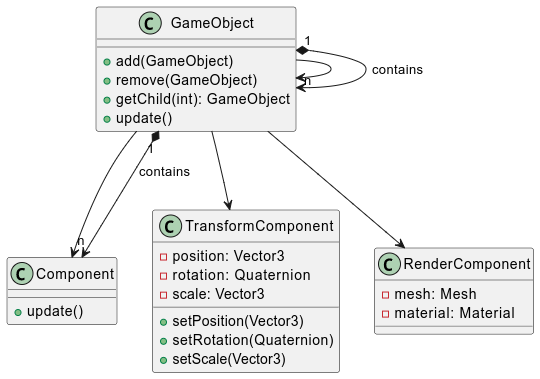

В данном примере паттерн компоновщик применяется для создания игровых объектов (класс GameObject), которые могут содержать в себе другие игровые объекты и компоненты (классы Component, TransformComponent и RenderComponent). Класс GameObject имеет методы для добавления и удаления дочерних игровых объектов и компонентов, а также метод для получения дочернего игрового объекта по индексу. Классы TransformComponent и RenderComponent являются компонентами, которые могут быть добавлены к игровому объекту и обеспечивают ему функциональность трансформации и рендеринга соответственно. Таким образом, паттерн компоновщик позволяет создавать сложные игровые объекты, состоящие из множества компонентов и дочерних игровых объектов.

## Реализация в Python
Создадим  класс для компонента:

In [1]:
class Component:
    def update(self):
        pass

Классы для игровых объектов:

In [2]:
class GameObject:
    def __init__(self):
        self.children = []
        self.components = []

    def add(self, obj):
        if isinstance(obj, GameObject):
            self.children.append(obj)
        elif isinstance(obj, Component):
            self.components.append(obj)

    def remove(self, obj):
        if isinstance(obj, GameObject):
            self.children.remove(obj)
        elif isinstance(obj, Component):
            self.components.remove(obj)

    def getChild(self, index):
        return self.children[index]

    def update(self):
        for component in self.components:
            component.update()
        for child in self.children:
            child.update()
class TransformComponent(Component):
    def __init__(self):
        self.position = Vector3()
        self.rotation = Quaternion()
        self.scale = Vector3()

    def setPosition(self, position):
        self.position = position

    def setRotation(self, rotation):
        self.rotation = rotation

    def setScale(self, scale):
        self.scale = scale

class RenderComponent(Component):
    def __init__(self):
        self.mesh = Mesh()
        self.material = Material()

class Vector3:
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z

class Quaternion:
    def __init__(self, x=0, y=0, z=0, w=1):
        self.x = x
        self.y = y
        self.z = z
        self.w = w

class Mesh:
    pass

class Material:
    pass

Реализуем примеры использования:

In [3]:
root = GameObject()
child1 = GameObject()
child2 = GameObject()

transform1 = TransformComponent()
render1 = RenderComponent()

child1.add(transform1)
child1.add(render1)

root.add(child1)
root.add(child2)

root.update()